In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 한글 폰트 설정 (Mac의 경우)
mpl.rc('font', family='AppleGothic')
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

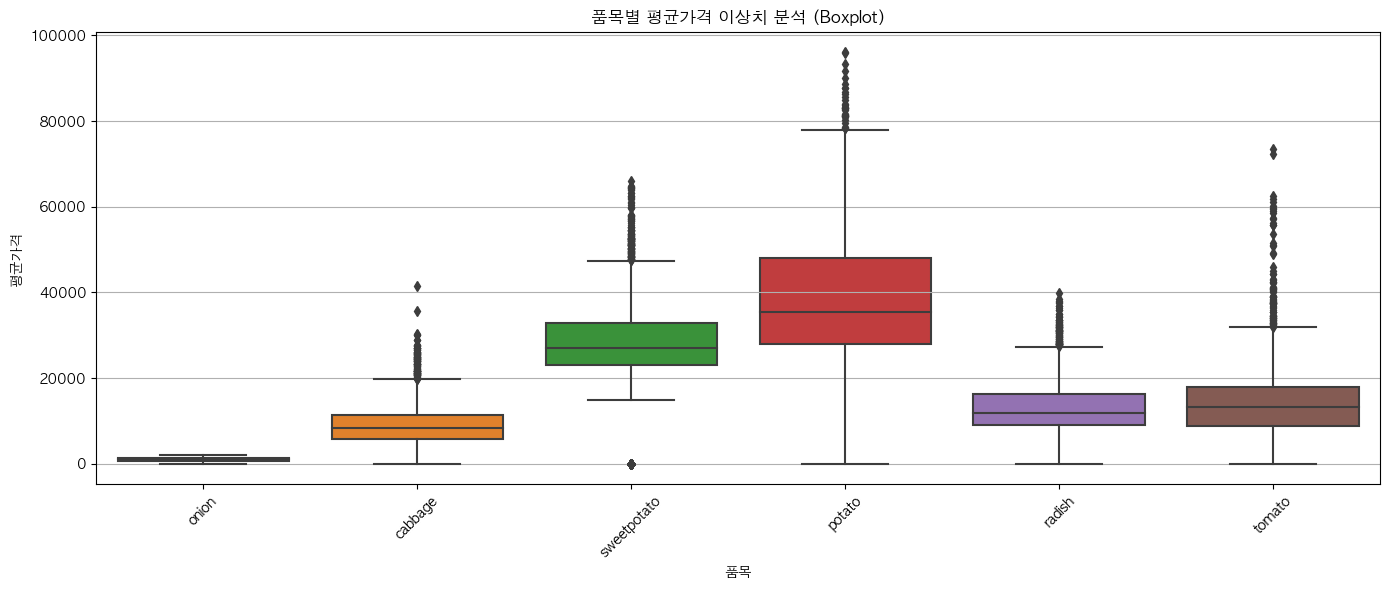

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 저장된 전처리 완료된 CSV 파일 로드
file_paths = {
    'onion': "onion_data/onion_final.csv",
    'cabbage': "cabbage_data/cabbage_final.csv",
    'sweetpotato': "sweetpotato_data/sweetpotato_final.csv",
    'potato': "potato_data/potato_final.csv",
    'radish': "radish_data/radish_final.csv",
    'tomato': "tomato_data/tomato_final_with_weather.csv"
}

# 데이터프레임 통합
df_list = []
for name, path in file_paths.items():
    df = pd.read_csv(path)
    df['품목'] = name
    df_list.append(df)

df_all = pd.concat(df_list, ignore_index=True)

# 평균가격이 너무 큰 이상치를 제거한 boxplot 시각화 (2.1 가격 이상치 분석)
plt.figure(figsize=(14, 6))
sns.boxplot(x='품목', y='평균가격', data=df_all, showfliers=True)
plt.title('품목별 평균가격 이상치 분석 (Boxplot)')
plt.ylabel('평균가격')
plt.xlabel('품목')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


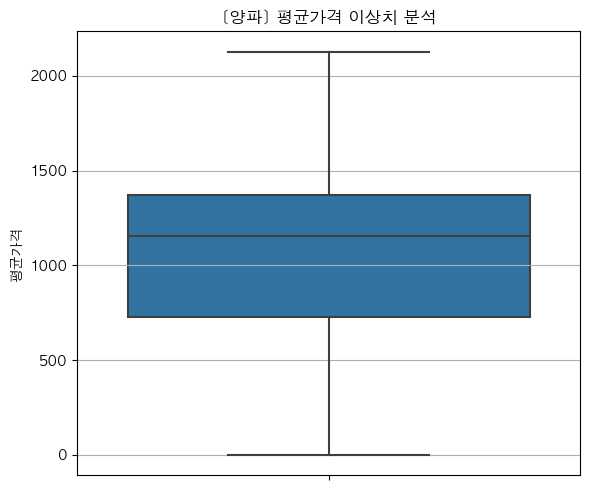

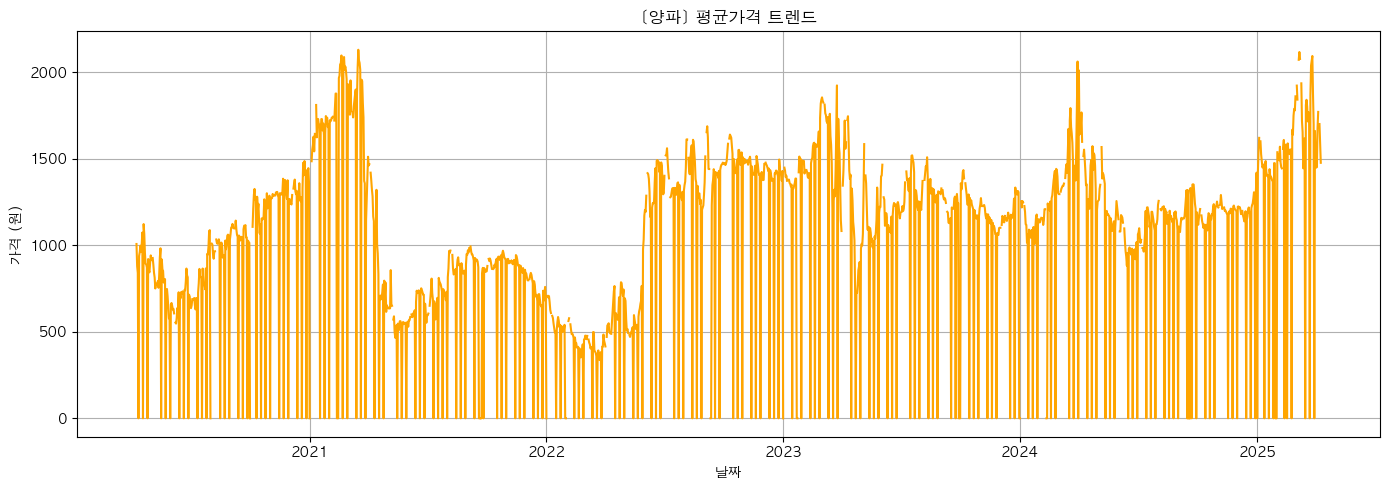

In [6]:
# 양파만 필터링
df_onion_only = df_all[df_all['품목'] == 'onion'].copy()
df_onion_only['DATE'] = pd.to_datetime(df_onion_only['DATE'])
df_onion_only = df_onion_only.sort_values('DATE')

# 이상치 분석 (boxplot) - 양파만
plt.figure(figsize=(6, 5))
sns.boxplot(y='평균가격', data=df_onion_only)
plt.title('[양파] 평균가격 이상치 분석')
plt.ylabel('평균가격')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 2.2 품목별 트렌드 분석 (라인그래프)
plt.figure(figsize=(14, 5))
plt.plot(df_onion_only['DATE'], df_onion_only['평균가격'], label='평균가격', color='orange')
plt.title('[양파] 평균가격 트렌드')
plt.xlabel('날짜')
plt.ylabel('가격 (원)')
plt.grid(True)
plt.tight_layout()
plt.show()


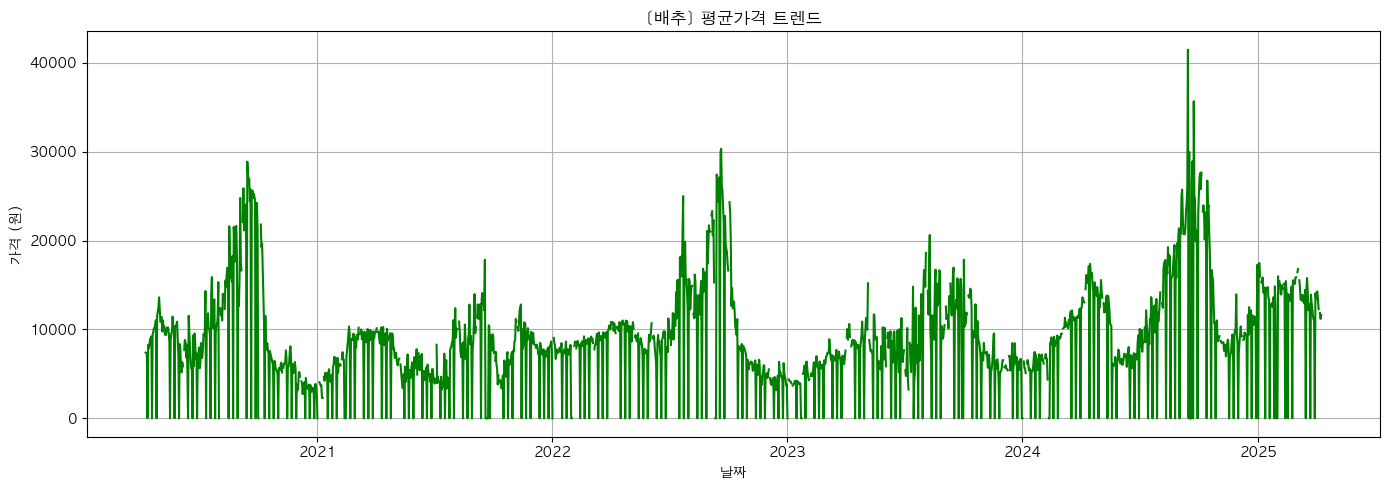

/var/folders/mc/npy4915s0gqclqt2wqx1vygm0000gn/T/ipykernel_64245/1844665590.py:21: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_cabbage['전일대비_가격변화율(%)'] = df_cabbage['평균가격'].pct_change() * 100


In [8]:
# 업로드된 배추 데이터 로드
import pandas as pd
import matplotlib.pyplot as plt

df_cabbage = pd.read_csv("cabbage_data/cabbage_final.csv")
df_cabbage['품목'] = 'cabbage'
df_cabbage['DATE'] = pd.to_datetime(df_cabbage['DATE'])
df_cabbage = df_cabbage.sort_values('DATE')

# 평균가격 트렌드 시각화
plt.figure(figsize=(14, 5))
plt.plot(df_cabbage['DATE'], df_cabbage['평균가격'], label='평균가격', color='green')
plt.title('[배추] 평균가격 트렌드')
plt.xlabel('날짜')
plt.ylabel('가격 (원)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 급등/급락 구간 추출 (변화율 절댓값 30% 이상)
df_cabbage['전일대비_가격변화율(%)'] = df_cabbage['평균가격'].pct_change() * 100
df_extreme = df_cabbage.loc[df_cabbage['전일대비_가격변화율(%)'].abs() > 30][
    ['DATE', '평균가격', '전일대비_가격변화율(%)']]


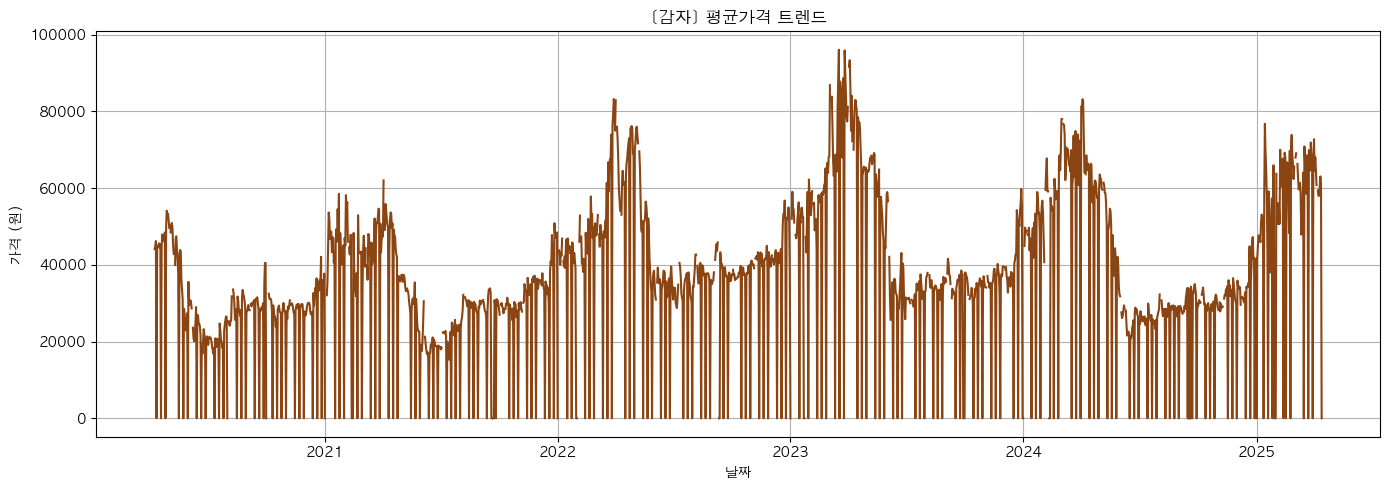

In [4]:
# 세션 초기화로 패키지 재로드 및 데이터 재불러오기
import pandas as pd
import matplotlib.pyplot as plt

# 감자 데이터 재로드
df_potato = pd.read_csv("potato_data/potato_final.csv")
df_potato['품목'] = 'potato'
df_potato['DATE'] = pd.to_datetime(df_potato['DATE'])
df_potato = df_potato.sort_values('DATE')

# 평균가격 트렌드 시각화
plt.figure(figsize=(14, 5))
plt.plot(df_potato['DATE'], df_potato['평균가격'], label='평균가격', color='saddlebrown')
plt.title('[감자] 평균가격 트렌드')
plt.xlabel('날짜')
plt.ylabel('가격 (원)')
plt.grid(True)
plt.tight_layout()
plt.show()


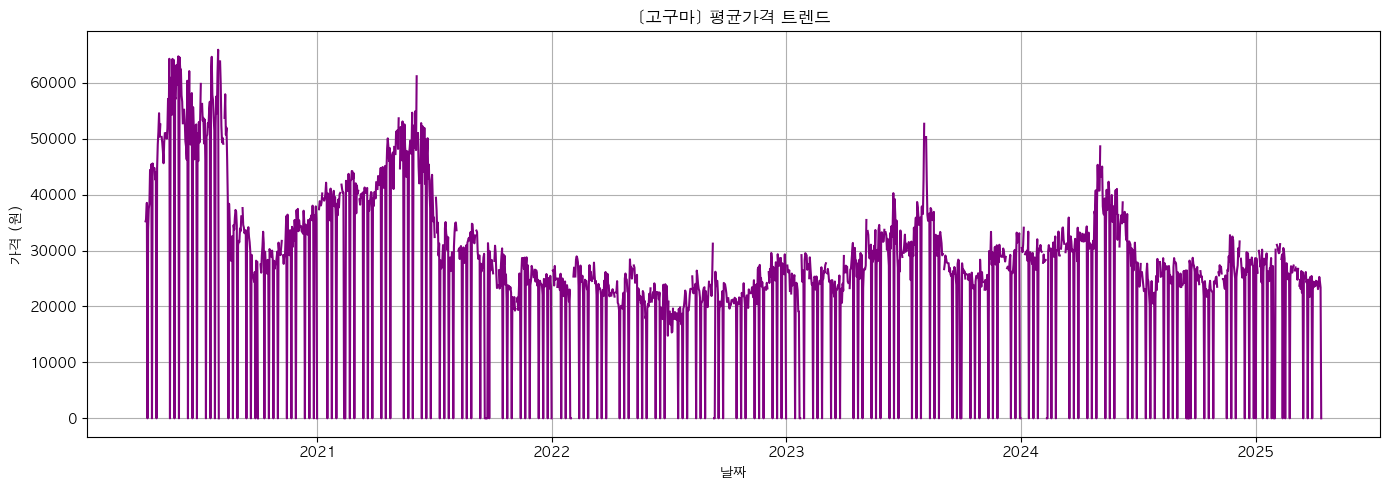

In [6]:
# 고구마 데이터 로드
df_sweetpotato = pd.read_csv("sweetpotato_data/sweetpotato_final.csv")
df_sweetpotato['DATE'] = pd.to_datetime(df_sweetpotato['DATE'])
df_sweetpotato = df_sweetpotato.sort_values('DATE')

# 고구마 평균가격 트렌드 시각화
plt.figure(figsize=(14, 5))
plt.plot(df_sweetpotato['DATE'], df_sweetpotato['평균가격'], color='purple')
plt.title('[고구마] 평균가격 트렌드')
plt.xlabel('날짜')
plt.ylabel('가격 (원)')
plt.grid(True)
plt.tight_layout()
plt.show()


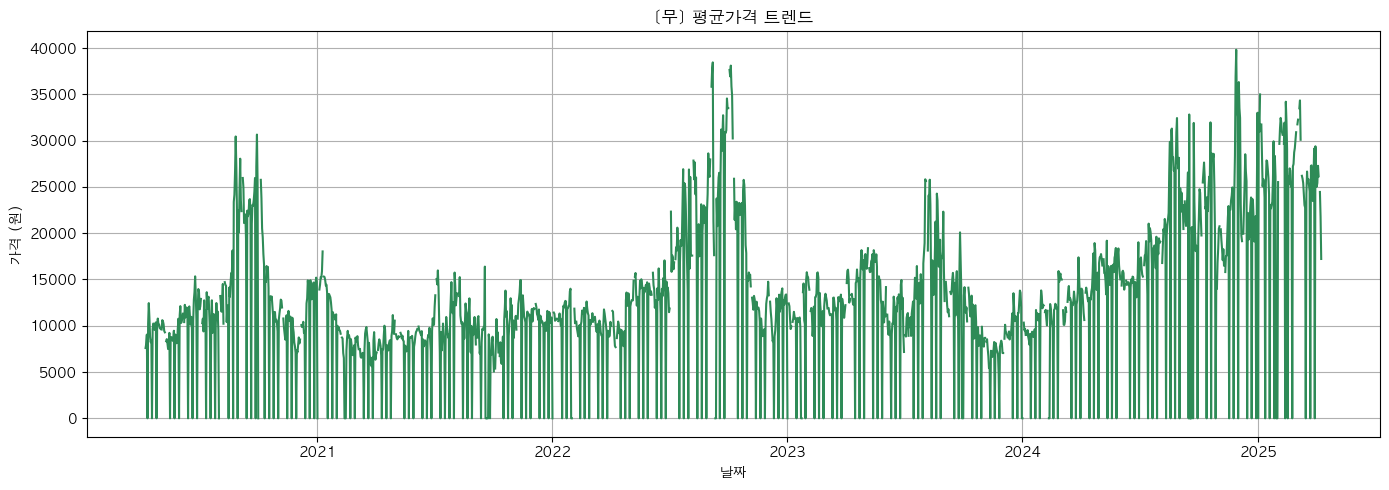

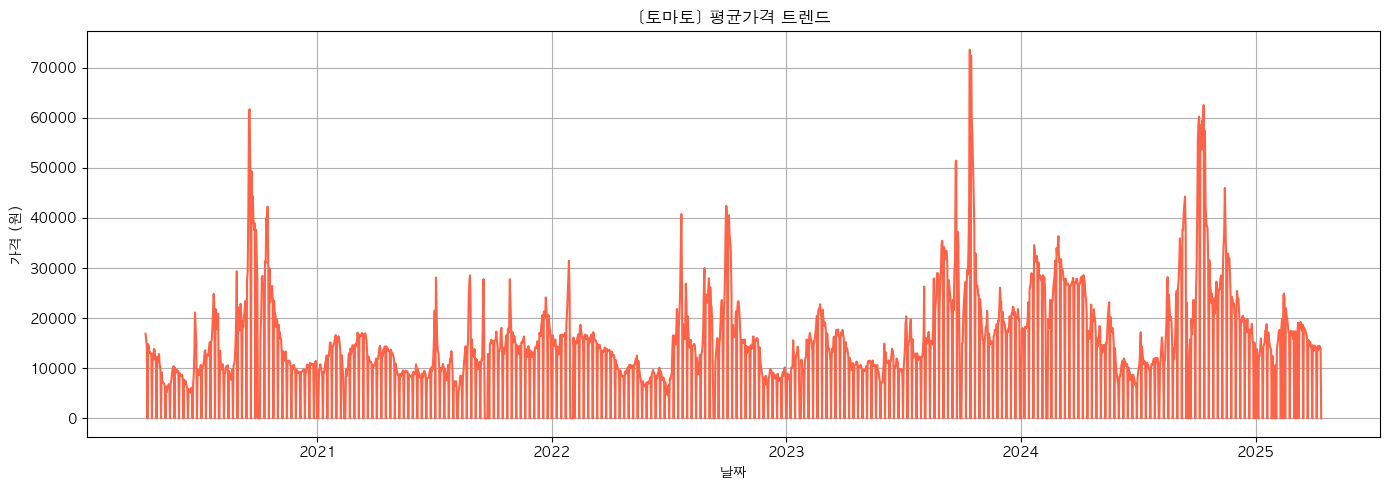

In [9]:
# 무 데이터 로드 및 시각화
df_radish = pd.read_csv("radish_data/radish_final.csv")
df_radish['DATE'] = pd.to_datetime(df_radish['DATE'])
df_radish = df_radish.sort_values('DATE')

plt.figure(figsize=(14, 5))
plt.plot(df_radish['DATE'], df_radish['평균가격'], color='seagreen')
plt.title('[무] 평균가격 트렌드')
plt.xlabel('날짜')
plt.ylabel('가격 (원)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 토마토 데이터 로드 및 시각화
df_tomato = pd.read_csv("tomato_data/tomato_final.csv")
df_tomato['DATE'] = pd.to_datetime(df_tomato['DATE'])
df_tomato = df_tomato.sort_values('DATE')

plt.figure(figsize=(14, 5))
plt.plot(df_tomato['DATE'], df_tomato['평균가격'], color='tomato')
plt.title('[토마토] 평균가격 트렌드')
plt.xlabel('날짜')
plt.ylabel('가격 (원)')
plt.grid(True)
plt.tight_layout()
plt.show()


## 월별 그래프

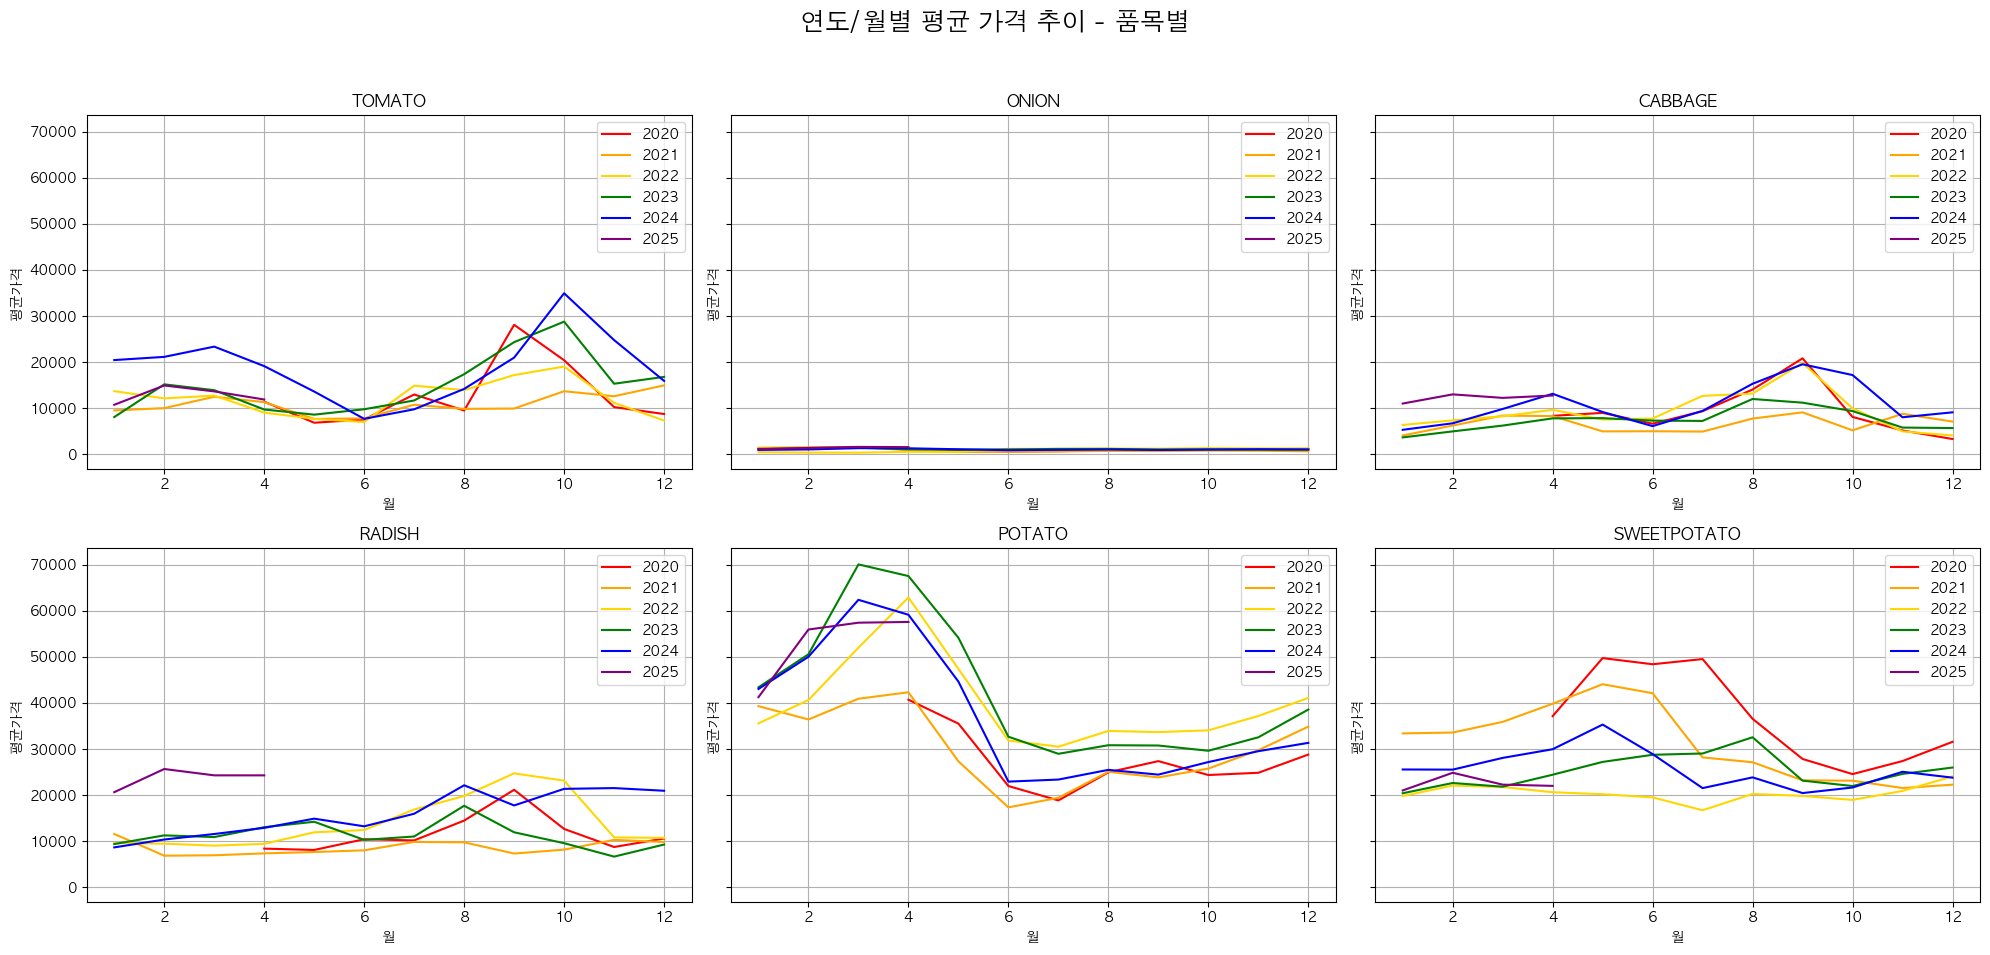

In [10]:
# 모든 전처리 완료된 6개 품목 데이터 경로 재정의
file_paths = {
    'tomato': 'tomato_data/tomato_final.csv',
    'onion': 'onion_data/onion_final.csv',
    'cabbage': 'cabbage_data/cabbage_final.csv',
    'radish': 'radish_data/radish_final.csv',
    'potato': 'potato_data/potato_final.csv',
    'sweetpotato': 'sweetpotato_data/sweetpotato_final.csv'
}

monthly_avg_by_item = {}

# 연도/월별 평균가격 계산
for name, path in file_paths.items():
    df = pd.read_csv(path)
    df['DATE'] = pd.to_datetime(df['DATE'])
    df['year'] = df['DATE'].dt.year
    df['month'] = df['DATE'].dt.month
    monthly_avg = df.groupby(['year', 'month'])['평균가격'].mean().reset_index()
    monthly_avg_by_item[name] = monthly_avg

# 시각화
fig, axes = plt.subplots(2, 3, figsize=(20, 10), sharey=True)
axes = axes.flatten()
colors = ['red', 'orange', 'gold', 'green', 'blue', 'purple']

for i, (name, df) in enumerate(monthly_avg_by_item.items()):
    ax = axes[i]
    for year, color in zip(sorted(df['year'].unique()), colors):
        df_year = df[df['year'] == year]
        ax.plot(df_year['month'], df_year['평균가격'], label=str(year), color=color)
    ax.set_title(name.upper())
    ax.set_xlabel('월')
    ax.set_ylabel('평균가격')
    ax.grid(True)
    ax.legend()

plt.suptitle('연도/월별 평균 가격 추이 - 품목별', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


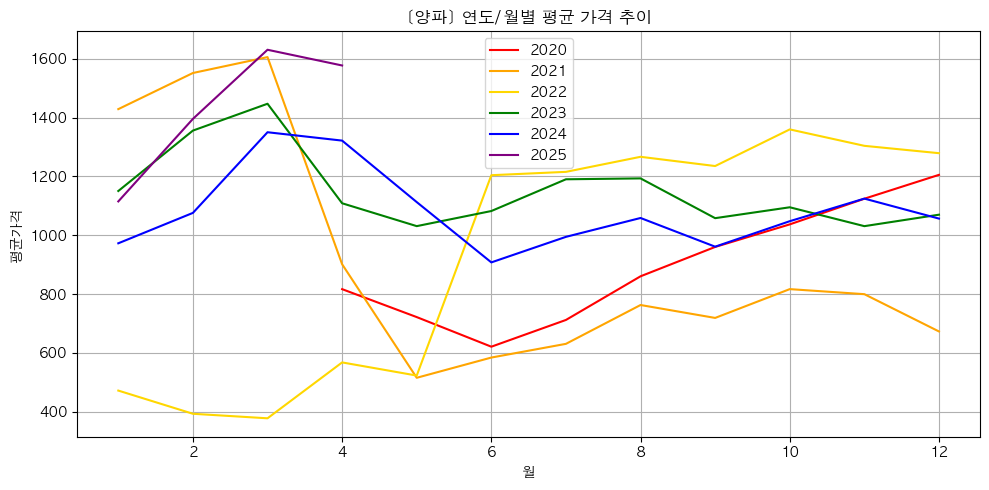

In [11]:
# 양파 데이터 재로드 및 전처리
df_onion = pd.read_csv("onion_data/onion_final.csv")
df_onion['DATE'] = pd.to_datetime(df_onion['DATE'])
df_onion['year'] = df_onion['DATE'].dt.year
df_onion['month'] = df_onion['DATE'].dt.month

# 연도/월별 평균가격 계산
monthly_avg_onion = df_onion.groupby(['year', 'month'])['평균가격'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 5))
colors = ['red', 'orange', 'gold', 'green', 'blue', 'purple']
for i, year in enumerate(sorted(monthly_avg_onion['year'].unique())):
    df_year = monthly_avg_onion[monthly_avg_onion['year'] == year]
    plt.plot(df_year['month'], df_year['평균가격'], label=str(year), color=colors[i % len(colors)])

plt.title('[양파] 연도/월별 평균 가격 추이')
plt.xlabel('월')
plt.ylabel('평균가격')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


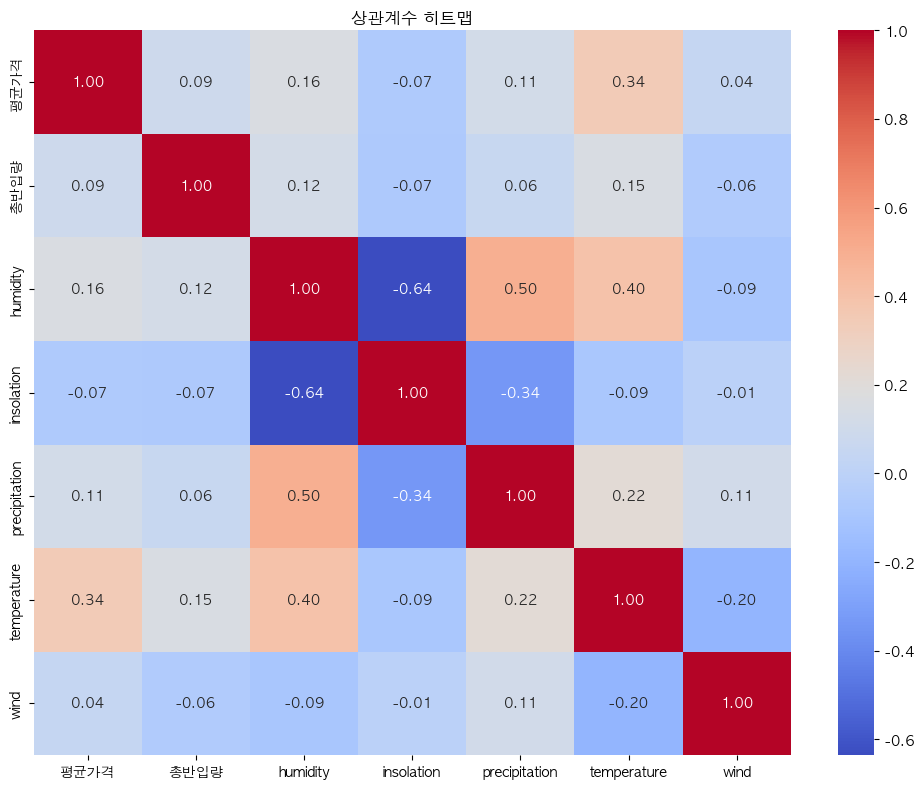

<Figure size 1000x400 with 0 Axes>

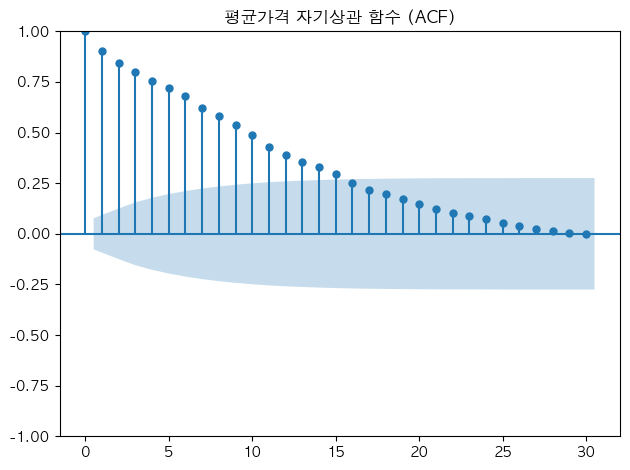

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

# 필요한 컬럼만 숫자로 필터링
numeric_df = df[['평균가격', '총반입량', 'humidity', 'insolation', 'precipitation', 'temperature', 'wind']]

# 결측치 제거
numeric_df = numeric_df.dropna()

# 상관계수 행렬 계산 및 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('상관계수 히트맵')
plt.tight_layout()
plt.show()

# 자기상관 함수 시각화
plt.figure(figsize=(10, 4))
plot_acf(numeric_df['평균가격'], lags=30)
plt.title('평균가격 자기상관 함수 (ACF)')
plt.tight_layout()
plt.show()


<Figure size 1000x400 with 0 Axes>

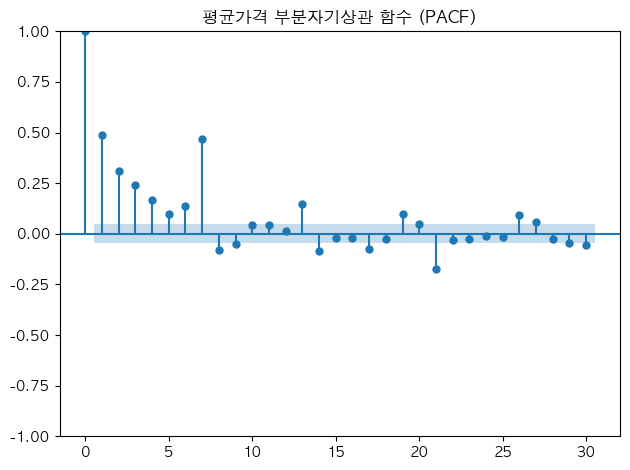

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# 데이터 로드
df = pd.read_csv("cabbage_data/cabbage_final.csv")

# '평균가격' 결측치 제거
price_series = df['평균가격'].dropna()

# PACF 시각화
plt.figure(figsize=(10, 4))
plot_pacf(price_series, lags=30, method='ywm')  # 'ywm'은 안정적인 방식 중 하나예요
plt.title("평균가격 부분자기상관 함수 (PACF)")
plt.tight_layout()
plt.show()


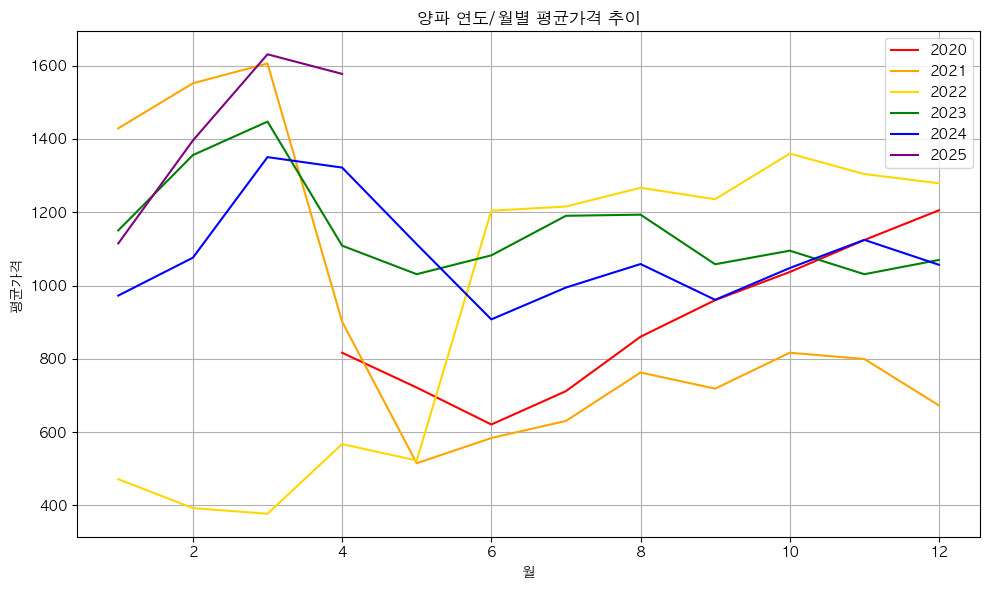

In [15]:
# onion 데이터 다시 불러오기
onion_path = "onion_data/onion_final.csv"
onion_df = pd.read_csv(onion_path)

# 날짜 처리 및 월별 평균가격 계산
onion_df['DATE'] = pd.to_datetime(onion_df['DATE'])
onion_df['year'] = onion_df['DATE'].dt.year
onion_df['month'] = onion_df['DATE'].dt.month
onion_monthly_avg = onion_df.groupby(['year', 'month'])['평균가격'].mean().reset_index()

# 시각화 (onion만)
plt.figure(figsize=(10, 6))
colors = ['red', 'orange', 'gold', 'green', 'blue', 'purple']
for year, color in zip(sorted(onion_monthly_avg['year'].unique()), colors):
    df_year = onion_monthly_avg[onion_monthly_avg['year'] == year]
    plt.plot(df_year['month'], df_year['평균가격'], label=str(year), color=color)

plt.title('양파 연도/월별 평균가격 추이')
plt.xlabel('월')
plt.ylabel('평균가격')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
